In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np 
from stabilizer import *
import matplotlib.pyplot as plt

# I(X:Y) vs f(pe)

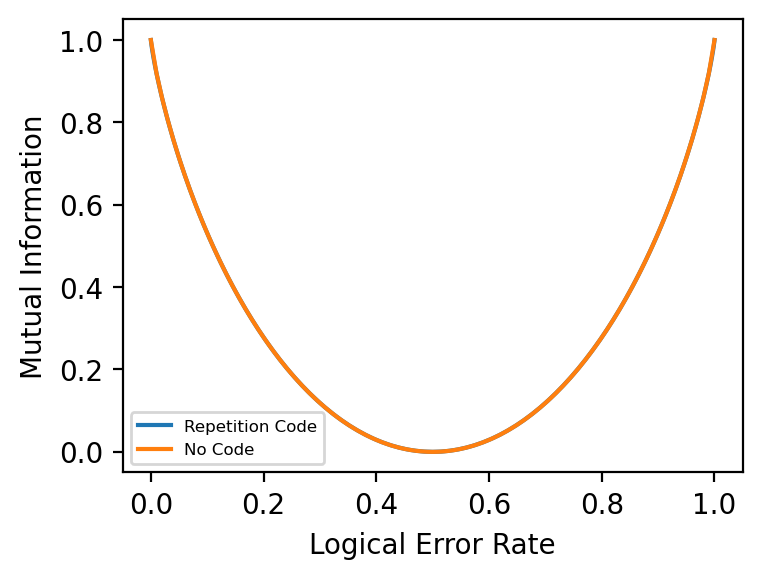

In [22]:
codes = {}
codes["Repetition Code"] = {"gates":[('CX', (0, 1)), ('CX', (0, 2))], "n": 3}
codes["No Code"] = {"gates":[], "n": 3}
run_code_analysis_mutual(codes, static=True)
plot_analysis_mutual(codes)

# I(X:Y) vs pe

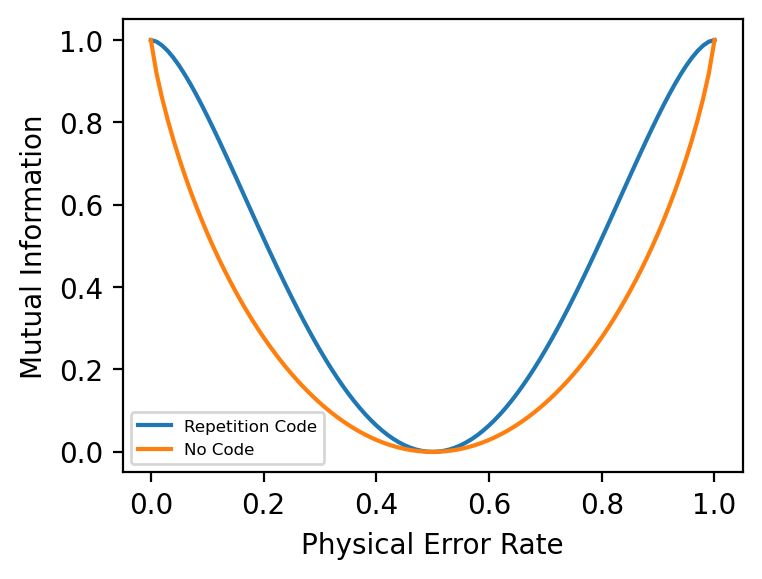

In [27]:
codes = {}
codes["Repetition Code"] = {"gates":[('CX', (0, 1)), ('CX', (0, 2))], "n": 3}
codes["No Code"] = {"gates":[], "n": 3}
run_code_analysis_mutual(codes, static=True)
plot_analysis_mutual_pe(codes)

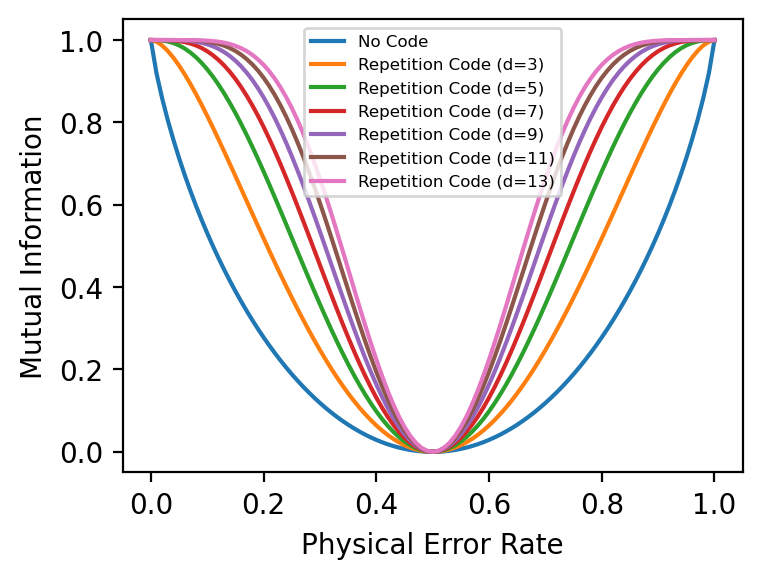

In [29]:
codes = {}
codes["No Code"] = {"gates":[],"n": 1}
for d in [3,5,7,9,11,13]:
    codes[f"Repetition Code (d={d})"] = {"gates":repetition_code_gates(d), "n": d}

run_code_analysis_mutual(codes, static=True)
plot_analysis_mutual_pe(codes)

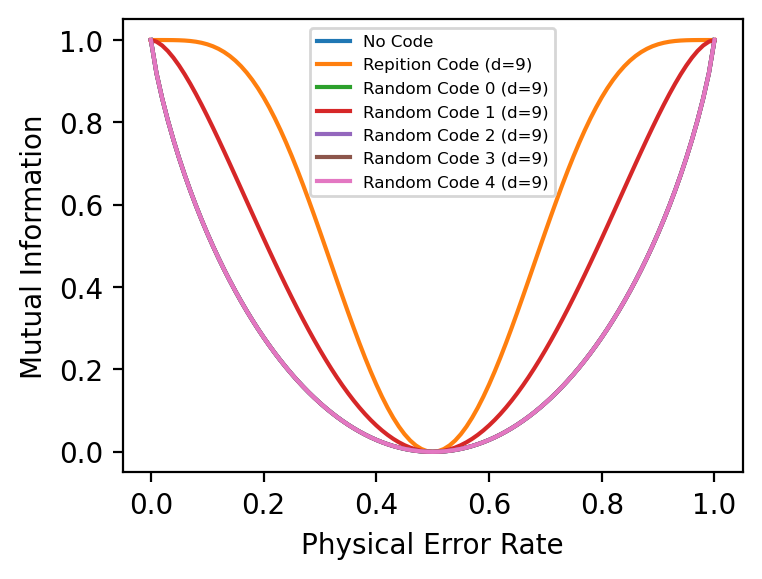

In [3]:
codes = {}
codes["No Code"] = {"gates":[],"n": 1}
d = 9
num_gates = 9*2
codes[f"Repition Code (d={d})"] = {"gates":repetition_code_gates(d), "n": d}
for j in range(5):
    codes[f"Random Code {j} (d={d})"] = {"gates":gen_random_encoding(d,num_gates), "n": d}
    
run_code_analysis_mutual(codes, static=True)
plot_analysis_mutual_pe(codes)

# Random Code Avg Performance

In [15]:
codes = {}
codes["No Code"] = {"gates":[],"n": 1}
d = 9
num_gates = 5
num_random_codes = 100

# Calculate Rep Code
codes[f"Repition Code (d={d})"] = {"gates":repetition_code_gates(d), "n": d}

# Calculate random codes
for j in range(num_random_codes):
    codes[(d,num_gates,j)] = {"gates":gen_random_encoding(d,num_gates), "n": d}
    
run_code_analysis_mutual(codes, static=True)

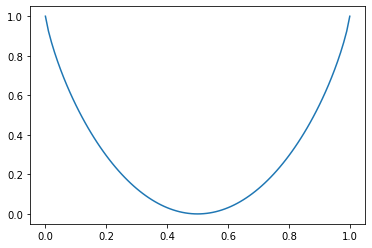

In [14]:
physical_error_probs = codes[(d,num_gates,0)]["physical_error_probs"]
avg_mutual_info = np.zeros_like(codes[(d,num_gates,0)]["physical_error_probs"])

for j in range(num_random_codes):
    avg_mutual_info += codes[(d,num_gates,j)]["Mutual Information"]

avg_mutual_info = avg_mutual_info/num_random_codes

plt.plot(physical_error_probs, avg_mutual_info)